# Dynamic Frequency Collector

## Mathematics

- Let there be an input signal $s(t)$ broken up into series $s = [s_0, s_1, ..., s_n]$ components at sampling frequency $f_s$.
- We aim to represent $s(t)$'s frequency band powers efficiently over time immediately upon the introduction of new information -- in other words, each $s_i$ is fed into the system at $f_s$ times per second. 
- We instantiate two __collector variables__ for the sine and cosine component $a$ and $b$ respectively.
- For each sample input:
    - $a := (1-\alpha) a + \alpha s_i \sin(\omega t) \frac{1}{f_s}$
    - $b := (1-\alpha) b + \alpha s_i \cos(\omega t) \frac{1}{f_s}$
    - Where $\alpha$ is the 'learning rate' or 'update rate', $\omega$ is the frequency of the band of interest.
- The live band power is equal to $p = a^2 + b^2$.

## Goals

- Show to experts to determine whether this approach has been taken already.
- Determine computational feasibility
- Effectiveness in representing time-frequency characteristics of the signals.

## Todo

- [x] Create a function that can take in a sample value, update rate, the frame rate, time value, current values for $a$ and $b$, and target frequency, and return updated values of $a$ and $b$.
---
- [ ] Create a class that can accept a new sample into its state machine -> perform computation with a large number of `Dynamic Frequency Collectors`

## Conclusions

Clearly a 

In [7]:
##############
# IMPORT BOX #
##############

import numpy as np
import matplotlib.pyplot as plt
import math

In [36]:
"""
=== GET UPDATED COLLECTOR VARIABLES ===
"""

def update_vars(s, a, b, t, freq=5, alpha=0.05, fs=200):
    """
    TAKES: 
        s:        The latest signal value from the new frame.
        a:        Current value for the sine component collector variable.
        b:        Current value for the cosine component collector variable.
        t:        The current time value (only really important that this is
                  in-phase with its starting point on the signal s(t)...)
        freq:     Target frequency (in HERTZ) that we are trying to analyze 
                  with this update call.
        alpha:    Update rate for the coefficients. Need more thought/experimentation.
        fs:       The sampling rate for the input signal. 
    
    RETURNS:
        a_prime:  New value for the sine collector variable.
        b_prime:  New value for the cosine collector variable.
    """
    
    a_prime = (1-alpha)*a + alpha*s*math.sin(2*math.pi*t*freq) 
    b_prime = (1-alpha)*b + alpha*s*math.cos(2*math.pi*t*freq)
    
    return a_prime, b_prime

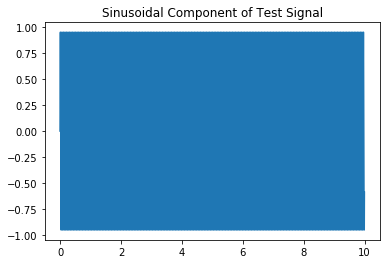

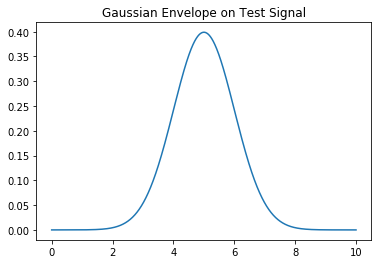

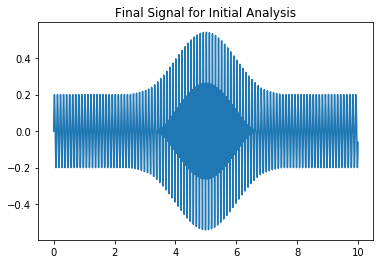

In [63]:
"""
=== SIGNAL GENERATION ===
"""

FS = 200
duration = 10 # seconds
center_freq = 20 # hertz

center = 5
stdev = 1

t = np.arange(FS*duration)/FS
signal_1 = np.sin(2 * math.pi * t * center_freq)

signal_noise = np.sin(2 * math.pi * t * center_freq/2)

gaussian_1 = 1/(stdev*math.sqrt(2*math.pi)) * np.exp( -0.5*((t-center)/stdev)**2 )

plt.title('Sinusoidal Component of Test Signal')
plt.plot(t, signal_1)
plt.show()

plt.title('Gaussian Envelope on Test Signal')
plt.plot(t, gaussian_1)
plt.show()

signal_2 = signal_1 * gaussian_1 + signal_noise*0.2

plt.title('Final Signal for Initial Analysis')
plt.plot(t, signal_2)
plt.show()

In [64]:
"""
=== TESTING COLLECTOR UPDATE FUNCTION ===
"""

a = b = time = 0

a_arry = [0]
b_arry = [0]

for i in signal_2:
    a, b = update_vars(i, a, b, time, freq=20, alpha=.1, fs=200)
    
    time += (1/FS)
    
    a_arry.append(a)
    b_arry.append(b)
    
a_arry = np.asarray(a_arry)
b_arry = np.asarray(b_arry)

power = a_arry**2 + b_arry**2

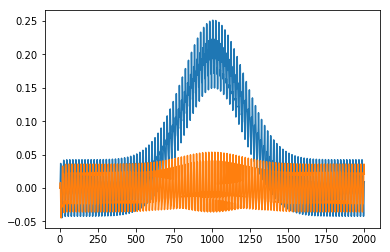

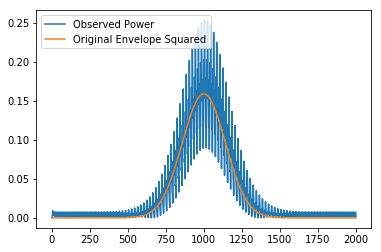

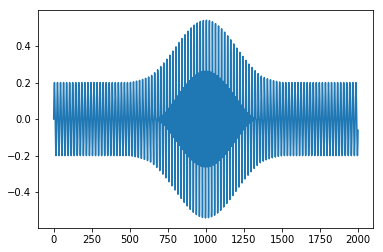

In [65]:
plt.plot(a_arry)
plt.plot(b_arry)
plt.show()

plt.plot(4*power)
plt.plot(gaussian_1**2)
plt.legend(['Observed Power', 'Original Envelope Squared'])
plt.show()

plt.plot(signal_2)